In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import numpy as np
import matplotlib.path as mpath
from scipy.io import loadmat
import mat73
from xgcm import Grid

import warnings
warnings.simplefilter("ignore")

from dask.distributed import Client
from dask.distributed import LocalCluster 

cluster = LocalCluster()
client = Client(cluster) 
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:35637/status,
Dashboard: http://127.0.0.1:35637/status,Workers: 4
Total threads: 8,Total memory: 30.94 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35047,Workers: 4
Dashboard: http://127.0.0.1:35637/status,Total threads: 8
Started: Just now,Total memory: 30.94 GiB
Comm: tcp://127.0.0.1:37552,Total threads: 2
Dashboard: http://127.0.0.1:36695/status,Memory: 7.73 GiB
Nanny: tcp://127.0.0.1:38992,


### Load output for CM4 piControl Simulation

In [2]:
CM4_static_ocean = xr.open_dataset('/net/Rebecca.Beadling/subtropical_gyres/mode_water/ocean_monthly.static.nc')
CM4_S_cntrl =  xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/piControl_output/ocean_annual_z.0251-0405.so.nc',
                             drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30),time=slice('0281-07-02','0380-07-02')).chunk({'time':10,'yh':63})

### Load output for CM4 perturbation simulations

In [5]:
CM4_Antwater_251 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwater_output/ocean_annual_z.0051-0070.so.nc'
                                   ,drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True
                                  ).sel(yh=slice(-90,-30),time=slice('0051-07-02','0070-07-02')).chunk({'yh':63})
CM4_Antwater_290 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwater_290/ocean_annual_z.0051-0070.so.nc'
                                   ,drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True
                                  ).sel(yh=slice(-90,-30)).chunk({'yh':63})
CM4_Antwater_332 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwater_332/ocean_annual_z.0051-0070.so.nc'
                                   ,drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True
                                  ).sel(yh=slice(-90,-30)).chunk({'yh':63})

CM4_AntwaterStress_251 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwaterstress_output/ocean_annual_z.0051-0070.so.nc'
                                   ,drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True
                                  ).sel(yh=slice(-90,-30),time=slice('0051-07-02','0070-07-02')).chunk({'yh':63})
CM4_AntwaterStress_290 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwaterstress_290/ocean_annual_z.0051-0070.so.nc'
                                   ,drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True
                                  ).sel(yh=slice(-90,-30)).chunk({'yh':63})
CM4_AntwaterStress_332 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafantwaterstress_332/ocean_annual_z.0051-0070.so.nc'
                                   ,drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True
                                  ).sel(yh=slice(-90,-30)).chunk({'yh':63})

CM4_Stress_251 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafstress_output/ocean_annual_z.0051-0070.so.nc'
                                   ,drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True
                                  ).sel(yh=slice(-90,-30),time=slice('0051-07-02','0070-07-02')).chunk({'yh':63})
CM4_Stress_290 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafstress_290/ocean_annual_z.0051-0070.so.nc'
                                   ,drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True
                                  ).sel(yh=slice(-90,-30)).chunk({'yh':63})
CM4_Stress_332 = xr.open_dataset('/net2/Rebecca.Beadling/southern_ocean_fafmip/fafstress_332/ocean_annual_z.0051-0070.so.nc'
                                   ,drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True
                                  ).sel(yh=slice(-90,-30)).chunk({'yh':63})

## To speed up plotting, the potential density fields referenced to 0 were computed seperately and saved as a netcdf file to be read in here

In [6]:
CM4_potorho_cntrl = xr.open_dataset('/net/Rebecca.Beadling/southern_ocean_fafmip/Figures/Ensemble-Means/CM4/1000m_isobath_transports/cm4_potential_density_ref_to_surf_100yr_ave_281_380.nc',
                             drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30))
potorho_cm4 = xr.open_dataset('/net/Rebecca.Beadling/southern_ocean_fafmip/Figures/Ensemble-Means/CM4/1000m_isobath_transports/cm4_potential_density_ref_to_surf_all_experiments_years51to70ave.nc',
                             drop_variables=['average_DT', 'average_T1', 'average_T2'],use_cftime=True).sel(yh=slice(-90,-30))

potorho_Antwater_251_ave = potorho_cm4.poto_rho_ref_surface_cm4_antwater_251 - 1000
potorho_Antwater_290_ave = potorho_cm4.poto_rho_ref_surface_cm4_antwater_290 - 1000
potorho_Antwater_332_ave = potorho_cm4.poto_rho_ref_surface_cm4_antwater_332 - 1000

potorho_AntwaterStress_251_ave = potorho_cm4.poto_rho_ref_surface_cm4_antwaterstress_251 - 1000
potorho_AntwaterStress_290_ave = potorho_cm4.poto_rho_ref_surface_cm4_antwaterstress_290 - 1000
potorho_AntwaterStress_332_ave = potorho_cm4.poto_rho_ref_surface_cm4_antwaterstress_332 - 1000

potorho_Stress_251_ave = potorho_cm4.poto_rho_ref_surface_cm4_stress_251 - 1000
potorho_Stress_290_ave = potorho_cm4.poto_rho_ref_surface_cm4_stress_290 - 1000
potorho_Stress_332_ave = potorho_cm4.poto_rho_ref_surface_cm4_stress_332 - 1000

### Compute ensemble means

In [8]:
Stress_Ens_Rho = xr.concat([potorho_Stress_251_ave,potorho_Stress_290_ave,potorho_Stress_332_ave],dim='member')
Stress_Ens_Rho_mean = Stress_Ens_Rho.mean(dim='member')
Stress_Ens_S = xr.concat([CM4_Stress_251,CM4_Stress_290,CM4_Stress_332],dim='member')
Stress_Ens_S_mean = Stress_Ens_S.so.mean(dim=['member','time'])

Antwater_Ens_Rho = xr.concat([potorho_Antwater_251_ave,potorho_Antwater_290_ave,potorho_Antwater_332_ave],dim='member')
Antwater_Ens_Rho_mean = Antwater_Ens_Rho.mean(dim='member')
Antwater_Ens_S = xr.concat([CM4_Antwater_251,CM4_Antwater_290,CM4_Antwater_332],dim='member')
Antwater_Ens_S_mean = Antwater_Ens_S.so.mean(dim=['member','time'])

AntwaterStress_Ens_Rho = xr.concat([potorho_AntwaterStress_251_ave,potorho_AntwaterStress_290_ave,potorho_AntwaterStress_332_ave],dim='member')
AntwaterStress_Ens_Rho_mean = AntwaterStress_Ens_Rho.mean(dim='member')
AntwaterStress_Ens_S = xr.concat([CM4_AntwaterStress_251,CM4_AntwaterStress_290,CM4_AntwaterStress_332],dim='member')
AntwaterStress_Ens_S_mean = AntwaterStress_Ens_S.so.mean(dim=['member','time'])

Cntrl_Rho = CM4_potorho_cntrl.poto_rho_ref_surface_cm4 - 1000

### Define Antarctic Slope Current Transects

In [9]:
## 20E
asc_20e_Stress_rho = Stress_Ens_Rho_mean.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest')
asc_20e_Stress = Stress_Ens_S_mean.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest')
asc_20e_Antwater_rho = Antwater_Ens_Rho_mean.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest')
asc_20e_Antwater = Antwater_Ens_S_mean.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest')
asc_20e_AntwaterStress_rho = AntwaterStress_Ens_Rho_mean.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest')
asc_20e_AntwaterStress = AntwaterStress_Ens_S_mean.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest')
asc_20e_cntrl_rho = Cntrl_Rho.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest')
asc_20e_cntrl = CM4_S_cntrl.sel(yh=slice(-70.5,-68)).sel(xh=20,method='nearest').mean(dim='time')
##150E
asc_150e_Stress_rho = Stress_Ens_Rho_mean.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest')
asc_150e_Stress = Stress_Ens_S_mean.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest')
asc_150e_Antwater_rho = Antwater_Ens_Rho_mean.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest')
asc_150e_Antwater = Antwater_Ens_S_mean.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest')
asc_150e_AntwaterStress_rho = AntwaterStress_Ens_Rho_mean.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest')
asc_150e_AntwaterStress = AntwaterStress_Ens_S_mean.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest')
asc_150e_cntrl_rho = Cntrl_Rho.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest')
asc_150e_cntrl = CM4_S_cntrl.sel(yh=slice(-69,-65.2)).sel(xh=-210,method='nearest').mean(dim='time')
##130W
asc_130w_Stress_rho = Stress_Ens_Rho_mean.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest')
asc_130w_Stress = Stress_Ens_S_mean.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest')
asc_130w_Antwater_rho = Antwater_Ens_Rho_mean.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest')
asc_130w_Antwater = Antwater_Ens_S_mean.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest')
asc_130w_AntwaterStress_rho = AntwaterStress_Ens_Rho_mean.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest')
asc_130w_AntwaterStress = AntwaterStress_Ens_S_mean.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest')
asc_130w_cntrl_rho = Cntrl_Rho.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest')
asc_130w_cntrl = CM4_S_cntrl.sel(yh=slice(-75,-72)).sel(xh=-130,method='nearest').mean(dim='time')
## 80W
asc_80w_Stress_rho = Stress_Ens_Rho_mean.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest')
asc_80w_Stress = Stress_Ens_S_mean.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest')
asc_80w_Antwater_rho = Antwater_Ens_Rho_mean.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest')
asc_80w_Antwater = Antwater_Ens_S_mean.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest')
asc_80w_AntwaterStress_rho = AntwaterStress_Ens_Rho_mean.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest')
asc_80w_AntwaterStress = AntwaterStress_Ens_S_mean.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest')
asc_80w_cntrl_rho = Cntrl_Rho.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest')
asc_80w_cntrl = CM4_S_cntrl.sel(yh=slice(-74,-68)).sel(xh=-80,method='nearest').mean(dim='time')

### Compute ensemble mean differences from piControl

In [10]:
asc_20e_diff_Stress = asc_20e_Stress - asc_20e_cntrl
asc_20e_diff_Antwater = asc_20e_Antwater - asc_20e_cntrl
asc_20e_diff_AntwaterStress = asc_20e_AntwaterStress - asc_20e_cntrl

asc_150e_diff_Stress = asc_150e_Stress - asc_150e_cntrl
asc_150e_diff_Antwater = asc_150e_Antwater - asc_150e_cntrl
asc_150e_diff_AntwaterStress = asc_150e_AntwaterStress - asc_150e_cntrl

asc_130w_diff_Stress = asc_130w_Stress - asc_130w_cntrl
asc_130w_diff_Antwater = asc_130w_Antwater - asc_130w_cntrl
asc_130w_diff_AntwaterStress = asc_130w_AntwaterStress - asc_130w_cntrl

asc_80w_diff_Stress = asc_80w_Stress - asc_80w_cntrl
asc_80w_diff_Antwater = asc_80w_Antwater - asc_80w_cntrl
asc_80w_diff_AntwaterStress = asc_80w_AntwaterStress - asc_80w_cntrl

### Functions to plot models true bathymetry accounting for partial cells

In [11]:
## Cannot have NaNs to use as coordinate in pcolormesh:
def forward_fill(arr):
    """ Forward fill a 2-D array along the column dimension"""
    # make a copy of the input array
    out = arr * 1.0
    # loop over column index
    for col_idx in range(0,arr.shape[1]):
        # get the column to work on
        _row = arr[:,col_idx]
        # get index numbers of nan values
        _nan_vals = np.argwhere(np.isnan(_row))
        # find the last "good" value
        _depth = 0. if _nan_vals[0] == 0 else _row[_nan_vals[0]-1]
        # set nan values to the last good value
        _row = np.where(np.isnan(_row),_depth,_row)
        # re-assign the filled column
        out[:,col_idx] = _row
    return out

def depth_to_center_partial(arr):
    kmax = arr.shape[0]
    zl  = 0.0 * arr[:]                              
    zl[0] = 0.5 * arr[0] 
    
    k = 1
    while k < kmax:
        zl[k] = zl[k-1] + 0.5 * (arr[k]+arr[k-1])
        k=k+1
    
    zl_nm = np.array(zl)
    
    zl = forward_fill(zl_nm)
    
    return zl

In [12]:
import momlevel as ml
cm4_thk = ml.derived.calc_dz(CM4_Antwater_251.z_l,CM4_Antwater_251.z_i,CM4_static_ocean.deptho)
cm4_thk = cm4_thk.where(cm4_thk>0)

thk_20e_cm4 = cm4_thk.sel(xh=20,method='nearest').sel(yh=slice(-70.5,-68)).load()
lat_20e_cm4 = cm4_thk.yh.sel(yh=slice(-70.5,-68))

thk_150e_cm4 = cm4_thk.sel(xh=-210,method='nearest').sel(yh=slice(-69,-65.2)).load()
lat_150e_cm4 = cm4_thk.yh.sel(yh=slice(-69,-65.2))

thk_130w_cm4 = cm4_thk.sel(xh=-130,method='nearest').sel(yh=slice(-75,-72)).load()
lat_130w_cm4 = cm4_thk.yh.sel(yh=slice(-75,-72))

thk_80w_cm4 = cm4_thk.sel(xh=-80,method='nearest').sel(yh=slice(-74,-68)).load()
lat_80w_cm4 = cm4_thk.yh.sel(yh=slice(-74,-68))

zl_20e_cm4 = depth_to_center_partial(thk_20e_cm4)
zl_150e_cm4 = depth_to_center_partial(thk_150e_cm4)
zl_130w_cm4 = depth_to_center_partial(thk_130w_cm4)
zl_80w_cm4 = depth_to_center_partial(thk_80w_cm4)

lat_20e_cm4 = np.broadcast_to(lat_20e_cm4,zl_20e_cm4.shape)
lat_150e_cm4 = np.broadcast_to(lat_150e_cm4,zl_150e_cm4.shape)
lat_130w_cm4 = np.broadcast_to(lat_130w_cm4,zl_130w_cm4.shape)
lat_80w_cm4 = np.broadcast_to(lat_80w_cm4,zl_80w_cm4.shape)

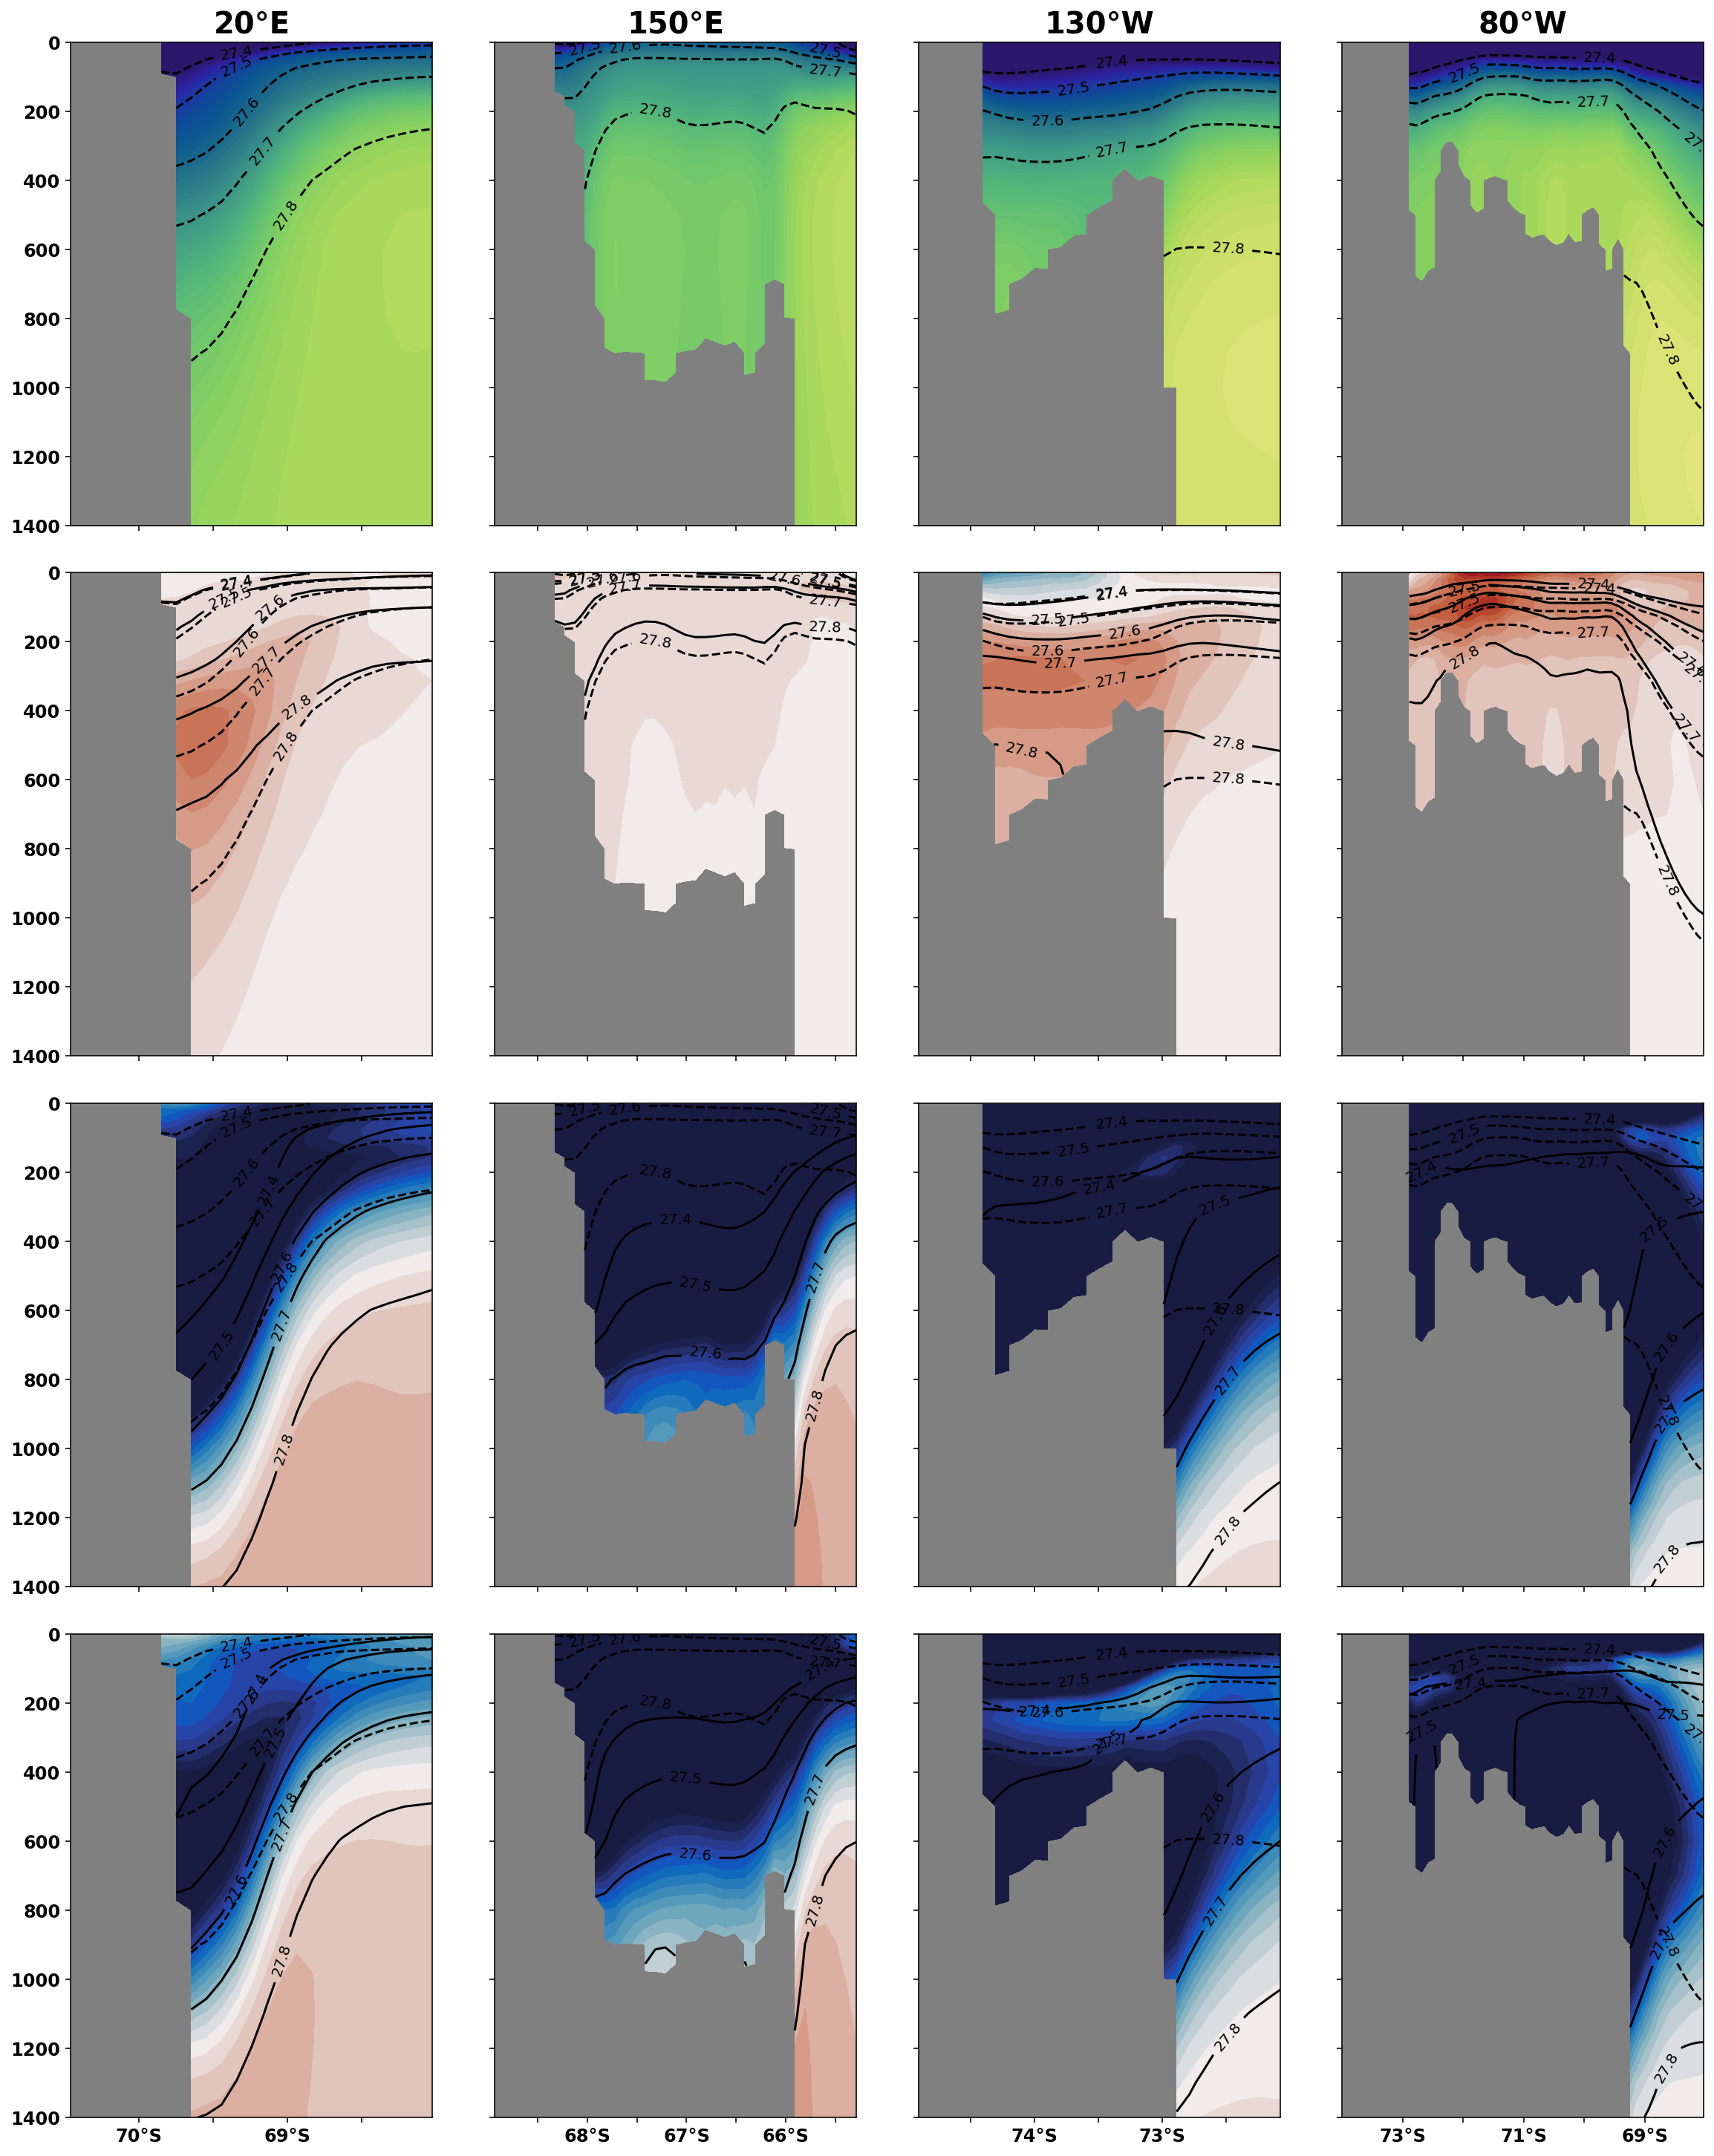

In [16]:
### Plot piControl so and anomalies at each cross-section:

f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12), (ax13, ax14, ax15, ax16)) = plt.subplots(ncols=4,nrows=4,figsize=(16,20),subplot_kw=dict(facecolor='grey'))

plt.tight_layout()

custom_ylim = (-1400,0)

plt.setp(ax1, ylim=custom_ylim)
plt.setp(ax2, ylim=custom_ylim)
plt.setp(ax3, ylim=custom_ylim)
plt.setp(ax4, ylim=custom_ylim)
plt.setp(ax5, ylim=custom_ylim)
plt.setp(ax6, ylim=custom_ylim)
plt.setp(ax7, ylim=custom_ylim)
plt.setp(ax8, ylim=custom_ylim)
plt.setp(ax9, ylim=custom_ylim)
plt.setp(ax10, ylim=custom_ylim)
plt.setp(ax11, ylim=custom_ylim)
plt.setp(ax12, ylim=custom_ylim)
plt.setp(ax13, ylim=custom_ylim)
plt.setp(ax14, ylim=custom_ylim)
plt.setp(ax15, ylim=custom_ylim)
plt.setp(ax16, ylim=custom_ylim)

levels_so = np.linspace(34.0,34.80,70)
levels_so_30 = np.linspace(-0.3,0.3,30)

################## Row 1 cm4 piControl 100-yr average #############

ax1.contourf(lat_20e_cm4,-zl_20e_cm4,asc_20e_cntrl.so.values,
             cmap=cmocean.cm.haline,levels=levels_so,
             extend='both',
             corner_mask=False)
a = ax1.contour(lat_20e_cm4,-zl_20e_cm4,asc_20e_cntrl_rho.values,
                colors='black',
                linestyles='--',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
ax1.clabel(a,inline=True)

ax2.contourf(lat_150e_cm4,-zl_150e_cm4,asc_150e_cntrl.so.values,
             cmap=cmocean.cm.haline,levels=levels_so,
             extend='both',
             corner_mask=False)
a = ax2.contour(lat_150e_cm4,-zl_150e_cm4,asc_150e_cntrl_rho.values,
                colors='black',
                linestyles='--',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
ax2.clabel(a,inline=True)


ax3.contourf(lat_130w_cm4,-zl_130w_cm4,asc_130w_cntrl.so.values,
             cmap=cmocean.cm.haline,levels=levels_so,
             extend='both',
             corner_mask=False)
a = ax3.contour(lat_130w_cm4,-zl_130w_cm4,asc_130w_cntrl_rho.values,
                colors='black',
                linestyles='--',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
ax3.clabel(a,inline=True)


ax4.contourf(lat_80w_cm4,-zl_80w_cm4,asc_80w_cntrl.so.values,
             cmap=cmocean.cm.haline,levels=levels_so,
             extend='both',
             corner_mask=False)
a = ax4.contour(lat_80w_cm4,-zl_80w_cm4,asc_80w_cntrl_rho.values,
                colors='black',
                linestyles='--',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
ax4.clabel(a,inline=True)



################## Row 2 cm4 Stress Differences #############

ax5.contourf(lat_20e_cm4,-zl_20e_cm4,asc_20e_diff_Stress.so.values,
             cmap=cmocean.cm.balance,
             levels=levels_so_30,
             extend='both',
             corner_mask=False)
e = ax5.contour(lat_20e_cm4,-zl_20e_cm4,asc_20e_cntrl_rho.values,
                colors='black',
                linestyles='--',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
f = ax5.contour(lat_20e_cm4,-zl_20e_cm4,asc_20e_Stress_rho.values,
                colors='black',
                linestyles='-',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
ax5.clabel(e,inline=True)
ax5.clabel(f,inline=True)


ax6.contourf(lat_150e_cm4,-zl_150e_cm4,asc_150e_diff_Stress.so.values,
             cmap=cmocean.cm.balance,
             levels=levels_so_30,
             extend='both',
             corner_mask=False)
g = ax6.contour(lat_150e_cm4,-zl_150e_cm4,asc_150e_cntrl_rho.values,
                colors='black',
                linestyles='--',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
h = ax6.contour(lat_150e_cm4,-zl_150e_cm4,asc_150e_Stress_rho.values,
                colors='black',
                linestyles='-',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
ax6.clabel(g,inline=True)
ax6.clabel(h,inline=True)


ax7.contourf(lat_130w_cm4,-zl_130w_cm4,asc_130w_diff_Stress.so.values,
             cmap=cmocean.cm.balance,
             levels=levels_so_30,
             extend='both',
             corner_mask=False)
i = ax7.contour(lat_130w_cm4,-zl_130w_cm4,asc_130w_cntrl_rho.values,
                colors='black',
                linestyles='--',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
j = ax7.contour(lat_130w_cm4,-zl_130w_cm4,asc_130w_Stress_rho.values,
                colors='black',
                linestyles='-',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
ax7.clabel(i,inline=True)
ax7.clabel(j,inline=True)


ax8.contourf(lat_80w_cm4,-zl_80w_cm4,asc_80w_diff_Stress.so.values,
             cmap=cmocean.cm.balance,
             levels=levels_so_30,
             extend='both',
             corner_mask=False)
k = ax8.contour(lat_80w_cm4,-zl_80w_cm4,asc_80w_cntrl_rho.values,
                colors='black',
                linestyles='--',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
l = ax8.contour(lat_80w_cm4,-zl_80w_cm4,asc_80w_Stress_rho.values,
                colors='black',
                linestyles='-',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
ax8.clabel(k,inline=True)
ax8.clabel(l,inline=True)


################## Row 3 cm4 Antwater Differences #############

ax9.contourf(lat_20e_cm4,-zl_20e_cm4,asc_20e_diff_Antwater.so.values,
             cmap=cmocean.cm.balance,
             levels=levels_so_30,
             extend='both',
             corner_mask=False)
m = ax9.contour(lat_20e_cm4,-zl_20e_cm4,asc_20e_cntrl_rho.values,
                colors='black',
                linestyles='--',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
n = ax9.contour(lat_20e_cm4,-zl_20e_cm4,asc_20e_Antwater_rho.values,
                colors='black',
                linestyles='-',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
ax9.clabel(m,inline=True)
ax9.clabel(n,inline=True)


ax10.contourf(lat_150e_cm4,-zl_150e_cm4,asc_150e_diff_Antwater.so.values,
             cmap=cmocean.cm.balance,
             levels=levels_so_30,
             extend='both',
             corner_mask=False)
o = ax10.contour(lat_150e_cm4,-zl_150e_cm4,asc_150e_cntrl_rho.values,
                colors='black',
                linestyles='--',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
p = ax10.contour(lat_150e_cm4,-zl_150e_cm4,asc_150e_Antwater_rho.values,
                colors='black',
                linestyles='-',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
ax10.clabel(o,inline=True)
ax10.clabel(p,inline=True)

ax11.contourf(lat_130w_cm4,-zl_130w_cm4,asc_130w_diff_Antwater.so.values,
             cmap=cmocean.cm.balance,
             levels=levels_so_30,
             extend='both',
             corner_mask=False)
q = ax11.contour(lat_130w_cm4,-zl_130w_cm4,asc_130w_cntrl_rho.values,
                colors='black',
                linestyles='--',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
r = ax11.contour(lat_130w_cm4,-zl_130w_cm4,asc_130w_Antwater_rho.values,
                colors='black',
                linestyles='-',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
ax11.clabel(q,inline=True)
ax11.clabel(r,inline=True)

ax12.contourf(lat_80w_cm4,-zl_80w_cm4,asc_80w_diff_Antwater.so.values,
             cmap=cmocean.cm.balance,
             levels=levels_so_30,
             extend='both',
             corner_mask=False)
s = ax12.contour(lat_80w_cm4,-zl_80w_cm4,asc_80w_cntrl_rho.values,
                colors='black',
                linestyles='--',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
t = ax12.contour(lat_80w_cm4,-zl_80w_cm4,asc_80w_Antwater_rho.values,
                colors='black',
                linestyles='-',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
ax12.clabel(s,inline=True)
ax12.clabel(t,inline=True)

################## Row 3 cm4 AntwaterStress Differences #############


ax13.contourf(lat_20e_cm4,-zl_20e_cm4,asc_20e_diff_AntwaterStress.so.values,
             cmap=cmocean.cm.balance,
             levels=levels_so_30,
             extend='both',
             corner_mask=False)
u = ax13.contour(lat_20e_cm4,-zl_20e_cm4,asc_20e_cntrl_rho.values,
                colors='black',
                linestyles='--',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
v = ax13.contour(lat_20e_cm4,-zl_20e_cm4,asc_20e_AntwaterStress_rho.values,
                colors='black',
                linestyles='-',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
ax13.clabel(u,inline=True)
ax13.clabel(v,inline=True)

ax14.contourf(lat_150e_cm4,-zl_150e_cm4,asc_150e_diff_AntwaterStress.so.values,
             cmap=cmocean.cm.balance,
             levels=levels_so_30,
             extend='both',
             corner_mask=False)
w = ax14.contour(lat_150e_cm4,-zl_150e_cm4,asc_150e_cntrl_rho.values,
                colors='black',
                linestyles='--',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
x = ax14.contour(lat_150e_cm4,-zl_150e_cm4,asc_150e_AntwaterStress_rho.values,
                colors='black',
                linestyles='-',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
ax14.clabel(w,inline=True)
ax14.clabel(x,inline=True)


ax15.contourf(lat_130w_cm4,-zl_130w_cm4,asc_130w_diff_AntwaterStress.so.values,
             cmap=cmocean.cm.balance,
             levels=levels_so_30,
             extend='both',
             corner_mask=False)
y = ax15.contour(lat_130w_cm4,-zl_130w_cm4,asc_130w_cntrl_rho.values,
                colors='black',
                linestyles='--',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
z = ax15.contour(lat_130w_cm4,-zl_130w_cm4,asc_130w_AntwaterStress_rho.values,
                colors='black',
                linestyles='-',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
ax15.clabel(y,inline=True)
ax15.clabel(z,inline=True)


ax16.contourf(lat_80w_cm4,-zl_80w_cm4,asc_80w_diff_AntwaterStress.so.values,
             cmap=cmocean.cm.balance,
             levels=levels_so_30,
             extend='both',
             corner_mask=False)
aa = ax16.contour(lat_80w_cm4,-zl_80w_cm4,asc_80w_cntrl_rho.values,
                colors='black',
                linestyles='--',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
bb = ax16.contour(lat_80w_cm4,-zl_80w_cm4,asc_80w_AntwaterStress_rho.values,
                colors='black',
                linestyles='-',
                linewidths=1.5,
                levels=[27.40,27.50,27.60,27.70,27.80,27.90],
                corner_mask=False)
ax16.clabel(aa,inline=True)
ax16.clabel(bb,inline=True)



#### Axis settings:
ax1.yaxis.set_ticklabels([1400,1200,1000,800,600,400,200,0],weight='bold',fontsize=12)
ax5.yaxis.set_ticklabels([1400,1200,1000,800,600,400,200,0],weight='bold',fontsize=12)
ax9.yaxis.set_ticklabels([1400,1200,1000,800,600,400,200,0],weight='bold',fontsize=12)
ax13.yaxis.set_ticklabels([1400,1200,1000,800,600,400,200,0],weight='bold',fontsize=12)


ax2.yaxis.set_ticklabels([])
ax3.yaxis.set_ticklabels([])
ax4.yaxis.set_ticklabels([])
ax6.yaxis.set_ticklabels([])
ax7.yaxis.set_ticklabels([])
ax8.yaxis.set_ticklabels([])
ax10.yaxis.set_ticklabels([])
ax11.yaxis.set_ticklabels([])
ax12.yaxis.set_ticklabels([])
ax14.yaxis.set_ticklabels([])
ax15.yaxis.set_ticklabels([])
ax16.yaxis.set_ticklabels([])

ax1.xaxis.set_ticklabels([])
ax2.xaxis.set_ticklabels([])
ax3.xaxis.set_ticklabels([])
ax4.xaxis.set_ticklabels([])
ax5.xaxis.set_ticklabels([])
ax6.xaxis.set_ticklabels([])
ax7.xaxis.set_ticklabels([])
ax8.xaxis.set_ticklabels([])
ax9.xaxis.set_ticklabels([])
ax10.xaxis.set_ticklabels([])
ax11.xaxis.set_ticklabels([])
ax12.xaxis.set_ticklabels([])

ax13.xaxis.set_ticklabels(['','70\N{degree sign}S','','69\N{degree sign}S'],weight='bold',fontsize=12)
ax14.xaxis.set_ticklabels(['','','68\N{degree sign}S','','67\N{degree sign}S','','66\N{degree sign}S'],weight='bold',fontsize=12)
ax15.xaxis.set_ticklabels(['','','74\N{degree sign}S','','73\N{degree sign}S'],weight='bold',fontsize=12)
ax16.xaxis.set_ticklabels(['','73\N{degree sign}S','','71\N{degree sign}S','','69\N{degree sign}S'],weight='bold',fontsize=12)

ax1.set_title('20\N{degree sign}E',weight='bold',fontsize=20)
ax2.set_title('150\N{degree sign}E',weight='bold',fontsize=20)
ax3.set_title('130\N{degree sign}W',weight='bold',fontsize=20)
ax4.set_title('80\N{degree sign}W',weight='bold',fontsize=20)

plt.savefig('cm4_Salinity_cross_sections.pdf')